In [1]:
import numpy as np
import os
import cv2
import pickle
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
DATASET_PATH = 'dataset'
IMAGE_SIZE = (128, 128)

features = []
labels = []

class_names = sorted(os.listdir(DATASET_PATH))
label_map = {name: i for i, name in enumerate(class_names)}

for class_name in tqdm(class_names):
    class_dir = os.path.join(DATASET_PATH, class_name)
    if not os.path.isdir(class_dir):
        continue
        
    for filename in os.listdir(class_dir):
        img_path = os.path.join(class_dir, filename)
        
        img = cv2.imread(img_path)
        if img is None:
            continue
        
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        img_resized = cv2.resize(img_gray, IMAGE_SIZE)
        
        hog_features = hog(img_resized, orientations=9, pixels_per_cell=(8, 8),
                           cells_per_block=(2, 2), block_norm='L2-Hys')
        
        features.append(hog_features)
        labels.append(label_map[class_name])

features = np.array(features, dtype=np.float32)
labels = np.array(labels)

print(f"\nDitemukan {features.shape[0]} sampel.")
print(f"Bentuk dari array fitur: {features.shape}")

100%|██████████| 12/12 [03:46<00:00, 18.92s/it]



Ditemukan 10397 sampel.
Bentuk dari array fitur: (10397, 8100)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42, stratify=labels)

print(f"Data Latih: {X_train.shape[0]} sampel")
print(f"Data Tes: {X_test.shape[0]} sampel")

svm_model = SVC(kernel='rbf', C=1.0)

svm_model.fit(X_train, y_train)

with open('models/svm_garbage_classifier.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

Data Latih: 8317 sampel
Data Tes: 2080 sampel


Akurasi Model: 55.00%


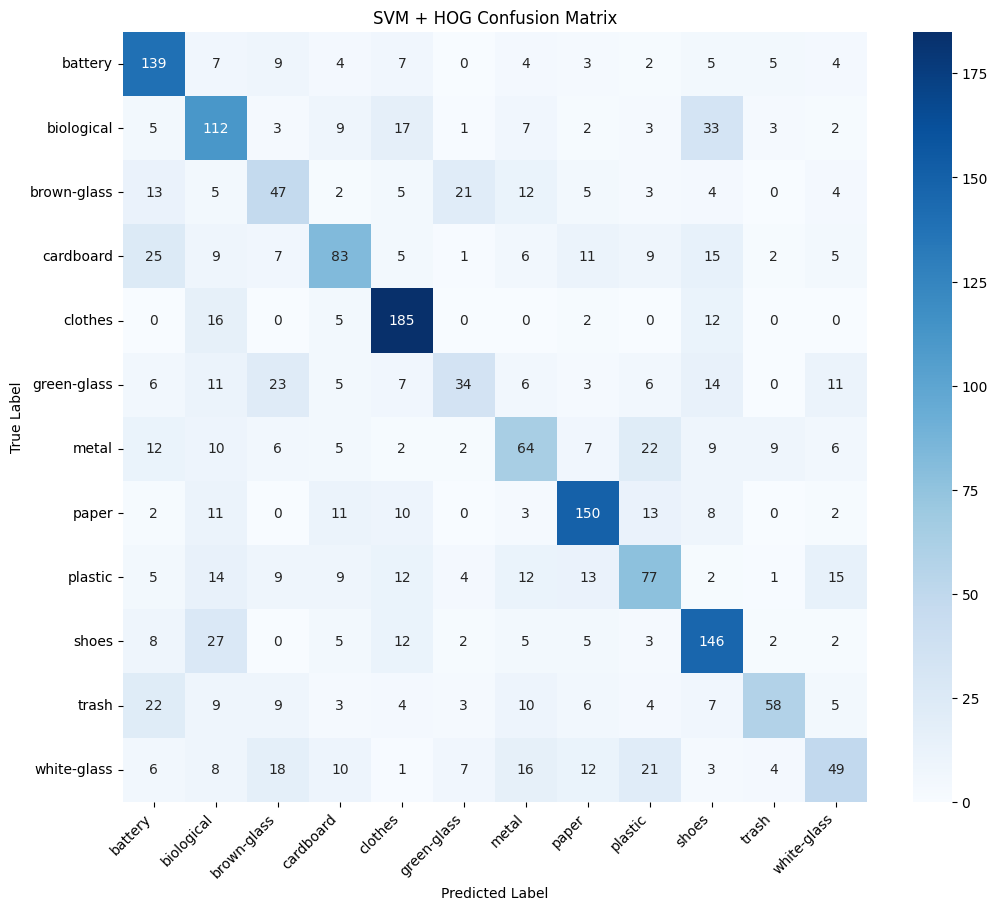

In [4]:
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy * 100:.2f}%")

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM + HOG Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.show()

In [6]:
MODEL_DIR = 'models'
MODEL_FILENAME = 'svm_garbage_classifier.pkl'
MODEL_PATH = os.path.join(MODEL_DIR, MODEL_FILENAME)

with open(MODEL_PATH, 'wb') as file:
    pickle.dump(svm_model, file)

print(f"{MODEL_PATH}")


models\svm_garbage_classifier.pkl
